# Weekly Special 35

## Exercise 1

First, we are showing that $\frac{\partial \mathbf{a}^T \mathbf{x}}{\partial \mathbf{x}} = \mathbf{a}^T$:

$$\frac{\partial \mathbf{a}^T \mathbf{x}}{\partial \mathbf{x}} = \frac{\partial }{\partial \mathbf{x}}(\sum_{i=0}^{n-1}a_ix_i) = \sum_{i=0}^{n-1}\frac{\partial }{\partial \mathbf{x}}(a_ix_i) = \sum_{i=0}^{n-1}a_i\mathbf{e}_i^T = \mathbf{a}^T$$

where $\mathbf{e}_i^T$ is a transposed unit vector with 1 in its $i$th entry. We see that the equality holds. 

Next up, we want to show that $\frac{\partial \mathbf{a}^T \mathbf{A} \mathbf{a}}{\partial \mathbf{a}} = \mathbf{a}^T(\mathbf{A} + \mathbf{A}^T)$. See calculation below:

$$\begin{align*}
\frac{\partial \mathbf{a}^T \mathbf{A} \mathbf{a}}{\partial \mathbf{a}} &= \frac{\partial}{\partial \mathbf{a}}(\mathbf{a}^T\sum_{i=0}^{n-1}(\sum_{j=0}^{n-1}A_{ij}a_{j})) \\ &= \frac{\partial}{\partial \mathbf{a}}(\sum_{i=0}^{n-1}\sum_{j=0}^{n-1}a_iA_{ij}a_{j}) \\ 

&= \frac{\partial}{\partial \mathbf{a}}(\sum_{i=0}^{n-1}\sum_{j=0}^{n-1}a_ia_jA_{ij}) \\

&= \sum_{i=0}^{n-1}\sum_{j=0}^{n-1}(a_iA_{ij}\mathbf{e}_j + a_jA_{ij}\mathbf{e}_i) \\

&= \sum_{i=0}^{n-1}\sum_{j=0}^{n-1}(a_i(A_{ij}+A_{ji})\mathbf{e}_j) \\

&= \mathbf{a}^T(\mathbf{A} + \mathbf{A}^T) 
\end{align*}$$

Now we want to show that $\frac{\partial (\mathbf{x} - \mathbf{A}\mathbf{s})^T(\mathbf{x} - \mathbf{A}\mathbf{s})}{\partial \mathbf{s}} = -2(\mathbf{x} - \mathbf{A}\mathbf{s})^T\mathbf{A}$.

$$ \begin{align*}

\frac{\partial (\mathbf{x} - \mathbf{A}\mathbf{s})^T(\mathbf{x} - \mathbf{A}\mathbf{s})}{\partial \mathbf{s}} &= \frac{\partial}{\partial \mathbf{s}} \sum_{i=0}^{n-1} (x_i - \sum_{j=0}^{n-1}A_{ij}s_j)^2 \\

&= -2\sum_{i=0}^{n-1} (x_i\mathbf e_i^T - \sum_{j=0}^{n-1}A_{ij}s_j \mathbf e_i^T) \mathbf A \\

&= -2(\mathbf{x} - \mathbf{A}\mathbf{s})^T\mathbf{A}

\end{align*}$$

Finally, the double derivative:

$$\begin{align*}

\frac{\partial^2 (\mathbf{x} - \mathbf{A}\mathbf{s})^T(\mathbf{x} - \mathbf{A} \mathbf s)}{\partial \mathbf{s}^2} &= \frac{\partial}{\partial \mathbf s}( -2(\mathbf{x} - \mathbf{A}\mathbf{s})^T\mathbf{A}) \\

&= -2\frac{\partial}{\partial \mathbf s}(\mathbf{x}^T \mathbf A - \mathbf{s}^T\mathbf A^T\mathbf{A}) \\

&=  2\frac{\partial}{\partial \mathbf s}(\mathbf{s}^T\mathbf A^T\mathbf{A}) \\

&= 2 \mathbf A^T \mathbf A

\end{align*}$$

## Exercise 2

In [409]:
# Importing various packages
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [410]:
# Setting up x and y
x = np.random.rand(100,1)
y = 2.0 + 5*x*x + 0.1*np.random.randn(100,1)

First, we will manually find the optimal coefficients of the polynomial by following the steps below:

In [411]:
# Setting up X (model dependence)
X_manual = np.array([[1, x_, x_**2] for x_ in x[:,0]])

# Calculating beta_hat (optimal set of parameters to minimize MSE in this case) and y_tilde (predictions)
beta_hat = np.linalg.inv(X_manual.T @ X_manual) @ X_manual.T @ y
y_tilde_manual = X_manual @ beta_hat

# Computing MSE
MSE_manual = 0.01 * (y - y_tilde_manual).T @ (y - y_tilde_manual)

print(MSE_manual[0,0])

0.009981737538842322


This looks great! Now we will use scikit-learn and see if we can make this a little easier for ourselves. 

In [412]:
# Setting up X
poly2 = PolynomialFeatures(degree=2)
X_sklearn = poly2.fit_transform(x)

# Finding coefficients of best fit and predicting y-values with these
clf2 = LinearRegression(fit_intercept=False)
clf2.fit(X_sklearn,y)

y_tilde_sklearn = clf2.predict(X_sklearn)

# Computing MSE
MSE_sklearn = mean_squared_error(y, y_tilde_sklearn)

# Computing variance score
variance_score_sklearn = r2_score(y, y_tilde_sklearn)

print(MSE_sklearn)
print(variance_score_sklearn)

0.009981737538842333
0.9958734343128344


This is also looking good. When we compare our manually computed MSE with the one from sklearn, we see they are very close in value, indicating similar implementations. They are also close to 0, which is desirable because it means the error in our data (deviation of the predicted values vs what we actually have) is low. The variance score is also very close to 1, indicating an almost perfect prediction.

As we might expect, varying the coefficient in front of our random noise term has an effect. It was originally at 0.1, which is what I described above and that we can still see the results of when we run the code. I tried changing it marginally, to 0.2 and 0.4, which gave us a lower variance score (more noise in the data set) and a higher MSE. Increasing it more, to 2 or 5 or even 10, almost completely destroyed the data, with a coefficient of 10 giving us a variance score of almost 0 and MSE near 100.

## Exercise 3

In [413]:
from sklearn.model_selection import train_test_split

np.random.seed()
n = 250

# Making data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [414]:
# Creating design matrix of a fifth-order polynomial
X = np.zeros((len(x),6))
X[:,0] = 1.0
X[:,1] = x[:,0]
X[:,2] = x[:,0]**2
X[:,3] = x[:,0]**3
X[:,4] = x[:,0]**4
X[:,5] = x[:,0]**5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [415]:
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_tilde_train = X_train @ beta_hat
y_tilde_test = X_test @ beta_hat

# MSE of training data
MSE_train = mean_squared_error(y_train, y_tilde_train)

# MSE of testing data
MSE_test = mean_squared_error(y_test, y_tilde_test)

print(MSE_train)
print(MSE_test)

0.02288457095370593
0.021676087638476282


Now we would like to expand this to a polynomial of degree 15.

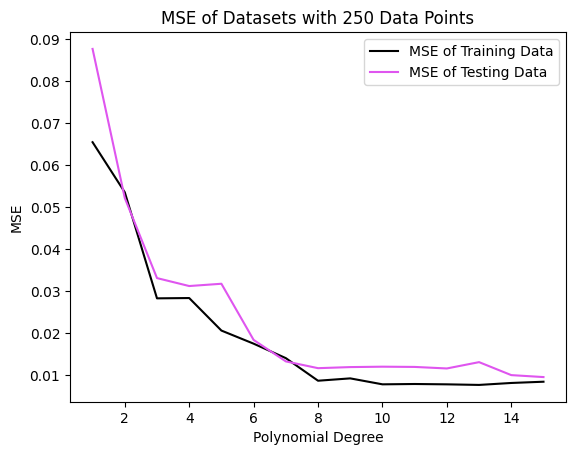

In [416]:
# Implementing the code above as a function

def make_model(deg, test_size=0.2):
    X = np.zeros((len(x),deg+1))

    for i in range(deg+1):
        X[:,i] = x[:,0]**i

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    y_tilde_train = X_train @ beta_hat
    y_tilde_test = X_test @ beta_hat

    # MSE of training data
    MSE_train = mean_squared_error(y_train, y_tilde_train)

    # MSE of testing data
    MSE_test = mean_squared_error(y_test, y_tilde_test)

    return MSE_train, MSE_test

# Setting up helper variables and arrays
max_degree = 15
poly_degree = range(1, max_degree+1)

train_error = np.zeros(max_degree)
test_error = np.zeros(max_degree)

# Gathering data from make_model function in arrays
for degree in poly_degree:
    MSE_train, MSE_test = make_model(degree)

    train_error[degree-1] = MSE_train
    test_error[degree-1] = MSE_test

# Plotting
plt.plot(poly_degree, train_error, label="MSE of Training Data", color="black")
plt.plot(poly_degree, test_error, label="MSE of Testing Data", color="#DF55EF")
plt.title(f"MSE of Datasets with {n} Data Points")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()

My figure does not look exactly like that of Hastie et al, and I'm not quite sure why that is. Upon multiple trials, my MSE graph does not seem to have a consistent minimum, and it looks like the trend is that higher polynomial degrees yield optimal MSEs. However, I understand that this can lead to overfitting of the training data, which in theory should give me a worse MSE of the testing data as the degree gets higher.